Objetivos:

1. Acceder a la base de datos
2. Importar los datos como dataframes de Pandas
3. Realizar la calidad de datos
4. Crear el datamart analítico
5. Guardarlo como una tabla en la base de datos para no tener que repetir el proceso

## SET UP

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTACION DE DATOS

### Datos internos

Crear la conexión a la base de datos

In [104]:
con = sa.create_engine('sqlite:///../Datos_Madrid_2024/airbnb.db')

In [105]:
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['listings', 'listings_det']

In [106]:
#carga de información

listings = pd.read_sql('listings', con)
listings_det = pd.read_sql('listings_det', con)

In [108]:
for cada in tablas:
    print(cada + ': ' + str(eval(cada).shape))

listings: (26980, 19)
listings_det: (26980, 76)


**WEB SCRAPING**


In [109]:
precio_m2 = pd.read_csv('../Datos_Madrid_2024/idealista.csv') \
    .loc[1:21,['table__cell 2','icon-elbow']] \
    .rename(columns = {'table__cell 2':'precio_m2', 'icon-elbow':'distrito'})

In [110]:
precio_m2

,precio_m2,distrito
1,5.062 €/m2,Arganzuela
2,3.901 €/m2,Barajas
3,2.889 €/m2,Carabanchel
4,6.594 €/m2,Centro
5,6.573 €/m2,Chamartín
6,7.173 €/m2,Chamberí
7,4.002 €/m2,Ciudad Lineal
8,4.305 €/m2,Fuencarral
9,4.490 €/m2,Hortaleza
10,3.068 €/m2,Latina


In [111]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     object
 1   distrito   21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


No queremos que sea un object porque querremos hacer operaciones con eso. Lo pilla como object porque tiene la estructura **"4.891 €/m2"**

In [112]:
#Generar nuevas variables separadas
precio_m2.precio_m2.str.split(expand = True)

,0,1
1,5.062,€/m2
2,3.901,€/m2
3,2.889,€/m2
4,6.594,€/m2
5,6.573,€/m2
6,7.173,€/m2
7,4.002,€/m2
8,4.305,€/m2
9,4.490,€/m2
10,3.068,€/m2


In [113]:
#Seleccionamos índice 0 y nos devuelve un Seriesl, pero entenderá que sigue siendo un Object por el punto en los números (como cáracter de texto)
precio_m2.precio_m2.str.split(expand = True) [0]

1     5.062
2     3.901
3     2.889
4     6.594
5     6.573
6     7.173
7     4.002
8     4.305
9     4.490
10    3.068
11    5.147
12    3.327
13    2.518
14    6.333
15    8.642
16    3.194
17    4.950
18    2.719
19    3.297
20    2.989
21    2.204
Name: 0, dtype: object

In [114]:
#Seleccionamos índice 0 y nos devuelve un Series, pero entenderá que sigue siendo un Object por el punto en los números (como cáracter de texto)
#Añadimos regex para hacerle entender que no es una expresión regular. Después, usamos "astype" y nos devuelve un int32
precio_m2.precio_m2.str.split(expand = True) [0].str.replace('.','', regex = False).astype('int')

1     5062
2     3901
3     2889
4     6594
5     6573
6     7173
7     4002
8     4305
9     4490
10    3068
11    5147
12    3327
13    2518
14    6333
15    8642
16    3194
17    4950
18    2719
19    3297
20    2989
21    2204
Name: 0, dtype: int32

In [115]:
#Sobreescribimos y lo convertimos a un dataframe

precio_m2['precio_m2'] = precio_m2.precio_m2.str.split(expand = True) [0].str.replace('.','', regex = False).astype('int')
precio_m2

,precio_m2,distrito
1,5062,Arganzuela
2,3901,Barajas
3,2889,Carabanchel
4,6594,Centro
5,6573,Chamartín
6,7173,Chamberí
7,4002,Ciudad Lineal
8,4305,Fuencarral
9,4490,Hortaleza
10,3068,Latina


In [116]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int32 
 1   distrito   21 non-null     object
dtypes: int32(1), object(1)
memory usage: 384.0+ bytes


In [117]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,902671779171769624,Habitación centro de Madrid 4,50080380,Rubens,Centro,Cortes,40.411812,-3.697614,Private room,NaN,7,3,2023-07-12,0.20,17,0,0,None
1,1,9753808,Habitación cuqui,41563621,Marie Rose,Centro,Embajadores,40.410970,-3.698240,Private room,NaN,1,1,2015-12-11,0.01,1,0,0,None
2,2,46899002,Habitación Doble con Baño Compartido,331096767,Sandra,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,NaN,1,0,None,NaN,4,0,0,None
3,3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Santiago,Centro,Palacio,40.408240,-3.713480,Private room,NaN,7,0,None,NaN,95,0,0,None
4,4,49895335,Teste,86662970,Igor,Ciudad Lineal,San Juan Bautista,40.453560,-3.656380,Private room,200.0,1,0,None,NaN,1,365,0,None


In [118]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           26980 non-null  int64  
 1   id                              26980 non-null  int64  
 2   name                            26980 non-null  object 
 3   host_id                         26980 non-null  int64  
 4   host_name                       26977 non-null  object 
 5   neighbourhood_group             26980 non-null  object 
 6   neighbourhood                   26980 non-null  object 
 7   latitude                        26980 non-null  float64
 8   longitude                       26980 non-null  float64
 9   room_type                       26980 non-null  object 
 10  price                           21068 non-null  float64
 11  minimum_nights                  26980 non-null  int64  
 12  number_of_reviews               

Creamos una variable temporal para eliminar columnas

In [119]:
a_eliminar = ['index',
              'host_name',
              'number_of_reviews',
              'last_review',
              'reviews_per_month',
              'number_of_reviews_ltm',
              'license']

listings.drop(columns = a_eliminar, inplace = True)

In [120]:
listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,902671779171769624,Habitación centro de Madrid 4,50080380,Centro,Cortes,40.411812,-3.697614,Private room,NaN,7,17,0
1,9753808,Habitación cuqui,41563621,Centro,Embajadores,40.410970,-3.698240,Private room,NaN,1,1,0
2,46899002,Habitación Doble con Baño Compartido,331096767,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,NaN,1,4,0
3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Centro,Palacio,40.408240,-3.713480,Private room,NaN,7,95,0
4,49895335,Teste,86662970,Ciudad Lineal,San Juan Bautista,40.453560,-3.656380,Private room,200.0,1,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
26975,40752289,Habitación privada en las afueras,316452014,Hortaleza,Canillas,40.465790,-3.646310,Private room,55.0,1,1,89
26976,1012976789399108005,habitación confortable baño privado,543956287,Carabanchel,San Isidro,40.398368,-3.731176,Private room,50.0,1,1,262
26977,972460503017050032,Habitación sencilla para viajero,145156213,Carabanchel,San Isidro,40.392473,-3.738062,Private room,18.0,2,1,10
26978,45926609,Bonita y alegre habitación a 10 mins de Atocha,20609984,Puente de Vallecas,San Diego,40.394390,-3.664280,Private room,35.0,7,12,365


In [121]:
#Vamos a ver si los tipos de datos tienen sentido.
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26980 non-null  int64  
 1   name                            26980 non-null  object 
 2   host_id                         26980 non-null  int64  
 3   neighbourhood_group             26980 non-null  object 
 4   neighbourhood                   26980 non-null  object 
 5   latitude                        26980 non-null  float64
 6   longitude                       26980 non-null  float64
 7   room_type                       26980 non-null  object 
 8   price                           21068 non-null  float64
 9   minimum_nights                  26980 non-null  int64  
 10  calculated_host_listings_count  26980 non-null  int64  
 11  availability_365                26980 non-null  int64  
dtypes: float64(3), int64(5), object(

**Distrito, barrio y tipo de habitación podrían ser category** ( ocupa menos espacio en memoria que en vez de Object) pero en este caso no pasaria nada. Igualmente vamos a probar cómo cambiarlo a category. O bien variable por variable **o intentar hacer algún tipo de automatización.**

In [122]:
for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype('category')

In [123]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              26980 non-null  int64   
 1   name                            26980 non-null  object  
 2   host_id                         26980 non-null  int64   
 3   neighbourhood_group             26980 non-null  category
 4   neighbourhood                   26980 non-null  category
 5   latitude                        26980 non-null  float64 
 6   longitude                       26980 non-null  float64 
 7   room_type                       26980 non-null  category
 8   price                           21068 non-null  float64 
 9   minimum_nights                  26980 non-null  int64   
 10  calculated_host_listings_count  26980 non-null  int64   
 11  availability_365                26980 non-null  int64   
dtypes: category(3), fl

**Vamos a comprobar los nulos. En la mayoria de los casos está bien** El único que nos descuadra es el de price. Así que vamos a echarle un ojo.

In [124]:
listings[listings.price.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,902671779171769624,Habitación centro de Madrid 4,50080380,Centro,Cortes,40.411812,-3.697614,Private room,NaN,7,17,0
1,9753808,Habitación cuqui,41563621,Centro,Embajadores,40.410970,-3.698240,Private room,NaN,1,1,0
2,46899002,Habitación Doble con Baño Compartido,331096767,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,NaN,1,4,0
3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Centro,Palacio,40.408240,-3.713480,Private room,NaN,7,95,0
5,11960656,ÁTICO MARAVILLOSO EN EL CENTRO,25706217,Centro,Universidad,40.428450,-3.703550,Private room,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25909,1152854022066908356,Bravo Murillo-37-1,576464572,Chamberí,Trafalgar,40.435700,-3.703461,Private room,NaN,15,176,37
26011,979438827888779917,Habitación acogedora,394574619,Vicálvaro,Ambroz,40.405942,-3.616488,Private room,NaN,3,1,0
26012,616027,"Quiet room well located, Av.America",3053021,Chamartín,Prosperidad,40.439220,-3.675740,Private room,NaN,1,1,0
26013,13964042,room in the heart of madrid (malasaña),11660622,Centro,Universidad,40.426030,-3.706920,Private room,NaN,3,1,0


Antes de manipular los datos, es importante entender por qué hay valores nulos:

**¿Los valores faltantes en price están relacionados con ciertas categorías como room_type o neighbourhood?**

**¿Son registros incompletos o irrelevantes para el análisis?**

Para explorar esto:

In [125]:
print(listings[listings['price'].isnull()].describe(include='all'))

                  id        name       host_id neighbourhood_group  \
count   5.912000e+03        5912  5.912000e+03                5912   
unique           NaN        5749           NaN                  21   
top              NaN  Habitación           NaN              Centro   
freq             NaN           8           NaN                2234   
mean    2.912086e+17         NaN  1.888395e+08                 NaN   
std     4.458784e+17         NaN  1.739816e+08                 NaN   
min     3.032000e+04         NaN  5.352600e+04                 NaN   
25%     2.138388e+07         NaN  3.849533e+07                 NaN   
50%     3.618600e+07         NaN  1.322783e+08                 NaN   
75%     7.326647e+17         NaN  2.872017e+08                 NaN   
max     1.218917e+18         NaN  5.945463e+08                 NaN   

       neighbourhood     latitude    longitude     room_type  price  \
count           5912  5912.000000  5912.000000          5912    0.0   
unique           


Dado que nuestro objetivo es identificar oportunidades de inversión en apartamentos turísticos en grandes ciudades,
es fundamental que los datos sean precisos y reflejen el mercado. Aquí tienes la mejor estrategia ajustada a tu objetivo:

**Rellenar los Valores Nulos Basándote en Datos Contextuales**

Es importante rellenar los valores nulos de price de forma lógica y consistente para reflejar el mercado real en cada ubicación y tipo de alojamiento.

Usa la Mediana por neighbourhood y room_type: La mediana es menos sensible a valores extremos y es más representativa del precio típico en un área.

In [126]:
listings['price'] = listings.groupby(['neighbourhood', 'room_type'], observed=True)['price'].transform(
    lambda x: x.fillna(x.median())
)

**Vamos a verificar los datos después del relleno**

In [127]:
print(listings['price'].describe())

count    26941.000000
mean       129.111039
std        331.692851
min          1.000000
25%         55.000000
50%         99.000000
75%        144.000000
max      21000.000000
Name: price, dtype: float64


Quedan valores nulos.

In [128]:
print(listings[listings['price'].isnull()].describe(include='all'))

                  id         name       host_id neighbourhood_group  \
count   3.900000e+01           39  3.900000e+01                  39   
unique           NaN           39           NaN                  14   
top              NaN  San Vicente           NaN              Centro   
freq             NaN            1           NaN                   7   
mean    3.094881e+16          NaN  1.697454e+08                 NaN   
std     1.932752e+17          NaN  1.139665e+08                 NaN   
min     1.114329e+07          NaN  1.917843e+07                 NaN   
25%     3.036078e+07          NaN  9.387251e+07                 NaN   
50%     3.521062e+07          NaN  1.383018e+08                 NaN   
75%     3.717175e+07          NaN  2.237095e+08                 NaN   
max     1.207004e+18          NaN  5.764646e+08                 NaN   

       neighbourhood   latitude  longitude    room_type  price  \
count             39  39.000000  39.000000           39    0.0   
unique         

**No tienen un impacto significativo, por lo que decidimos borrar esos nulos.**

In [129]:
listings = listings.dropna(subset=['price'])

In [130]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26941 entries, 0 to 26979
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              26941 non-null  int64   
 1   name                            26941 non-null  object  
 2   host_id                         26941 non-null  int64   
 3   neighbourhood_group             26941 non-null  category
 4   neighbourhood                   26941 non-null  category
 5   latitude                        26941 non-null  float64 
 6   longitude                       26941 non-null  float64 
 7   room_type                       26941 non-null  category
 8   price                           26941 non-null  float64 
 9   minimum_nights                  26941 non-null  int64   
 10  calculated_host_listings_count  26941 non-null  int64   
 11  availability_365                26941 non-null  int64   
dtypes: category(3), float64

## Análisis de variables categóricas

In [131]:
#Conteo de frecuencias
listings.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   11158
Chamberí                  1765
Salamanca                 1755
Tetuán                    1615
Arganzuela                1465
Carabanchel               1027
Ciudad Lineal              970
Retiro                     952
Puente de Vallecas         840
Chamartín                  835
Latina                     773
Moncloa - Aravaca          717
Usera                      626
San Blas - Canillejas      604
Hortaleza                  530
Fuencarral - El Pardo      406
Villaverde                 279
Moratalaz                  207
Barajas                    189
Villa de Vallecas          142
Vicálvaro                   86
Name: count, dtype: int64

In [132]:
listings.neighbourhood.value_counts()

neighbourhood
Embajadores      2992
Universidad      2408
Palacio          1894
Sol              1431
Justicia         1332
                 ... 
Valdemarín          8
Fuentelareina       5
El Pardo            4
Horcajo             3
Atalaya             1
Name: count, Length: 128, dtype: int64

**No nos interesan aquí hoteles** para nuestro análisis porque queremos comprar inmuebles. Vamos a eliminar los registros.

In [133]:
listings.shape

(26941, 12)

In [134]:
listings = listings.loc[listings.room_type != 'Hotel room']
listings.shape

(26865, 12)

## Análisis de variables numéricas

In [135]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26865 entries, 0 to 26979
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              26865 non-null  int64   
 1   name                            26865 non-null  object  
 2   host_id                         26865 non-null  int64   
 3   neighbourhood_group             26865 non-null  category
 4   neighbourhood                   26865 non-null  category
 5   latitude                        26865 non-null  float64 
 6   longitude                       26865 non-null  float64 
 7   room_type                       26865 non-null  category
 8   price                           26865 non-null  float64 
 9   minimum_nights                  26865 non-null  int64   
 10  calculated_host_listings_count  26865 non-null  int64   
 11  availability_365                26865 non-null  int64   
dtypes: category(3), float64

In [136]:
#Nos interesa la variable price, minimum_nights, calculated_host_listings_count y availability_365. Es decir del índice 8 al 11

In [137]:
#intervalo abierto y describe con la traspuesta para que se lea mejor.
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,26865.0,128.679490,331.780905,1.0,55.0,99.0,144.0,21000.0
minimum_nights,26865.0,8.050326,30.208662,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,26865.0,30.355518,69.663086,1.0,1.0,3.0,17.0,322.0
availability_365,26865.0,156.282896,128.604285,0.0,26.0,140.0,276.0,365.0


Es raro que la desviación típica cambie tanto en relación a la media. Los mínimos 1€ o los máximos 21000€/noche es raro.

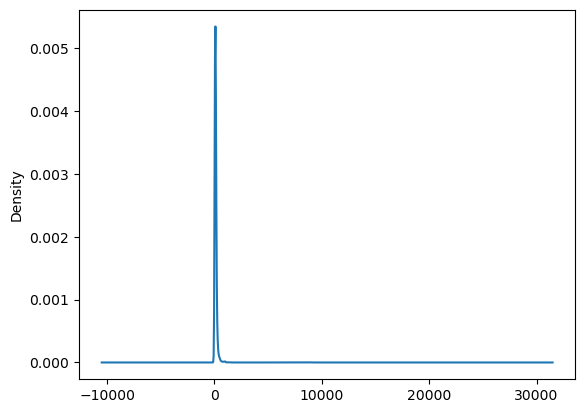

In [138]:
#Empezamos con el precio. Variable cuantitativa asi que gráficos de densidad o histogramas.
listings.price.plot.kde();

In [139]:
#nos lo ordena por frecuencia por defecto, así que ordenamos por índice con .sort_index()
listings.price.loc[listings.price > 1000].value_counts().sort_index()

price
1001.0     1
1020.0     1
1042.0     1
1050.0     1
1100.0     1
1114.0     1
1142.0     1
1194.0     1
1200.0     8
1201.0     1
1286.0     1
1309.0     1
1312.0     1
1320.0     1
1324.0     1
1344.0     1
1400.0     1
1445.0     1
1457.0     1
1500.0     6
1523.0     1
1700.0     1
1777.0     1
2000.0     5
2100.0     1
2450.0     1
2957.0     1
2999.0     1
3000.0     2
3100.0     1
3990.0     1
4720.0     1
5000.0     1
5500.0     1
6000.0     1
7273.0     1
7429.0     1
7999.0     1
8000.0     3
8469.0     1
9000.0     5
9059.0     3
9218.0     1
9999.0     3
15999.0    1
18657.0    1
21000.0    1
Name: count, dtype: int64

In [140]:
#Me acabo de dar cuenta de que price es un float y no un int64, así que voy a cambiarlo.
listings['price'] = listings['price'].astype(np.int64)

In [141]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26865 entries, 0 to 26979
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              26865 non-null  int64   
 1   name                            26865 non-null  object  
 2   host_id                         26865 non-null  int64   
 3   neighbourhood_group             26865 non-null  category
 4   neighbourhood                   26865 non-null  category
 5   latitude                        26865 non-null  float64 
 6   longitude                       26865 non-null  float64 
 7   room_type                       26865 non-null  category
 8   price                           26865 non-null  int64   
 9   minimum_nights                  26865 non-null  int64   
 10  calculated_host_listings_count  26865 non-null  int64   
 11  availability_365                26865 non-null  int64   
dtypes: category(3), float64

In [142]:
#nos lo ordena por frecuencia por defecto, así que ordenamos por índice con .sort_index()
listings.price.loc[listings.price > 1000].value_counts().sort_index()

price
1001     1
1020     1
1042     1
1050     1
1100     1
1114     1
1142     1
1194     1
1200     8
1201     1
1286     1
1309     1
1312     1
1320     1
1324     1
1344     1
1400     1
1445     1
1457     1
1500     6
1523     1
1700     1
1777     1
2000     5
2100     1
2450     1
2957     1
2999     1
3000     2
3100     1
3990     1
4720     1
5000     1
5500     1
6000     1
7273     1
7429     1
7999     1
8000     3
8469     1
9000     5
9059     3
9218     1
9999     3
15999    1
18657    1
21000    1
Name: count, dtype: int64

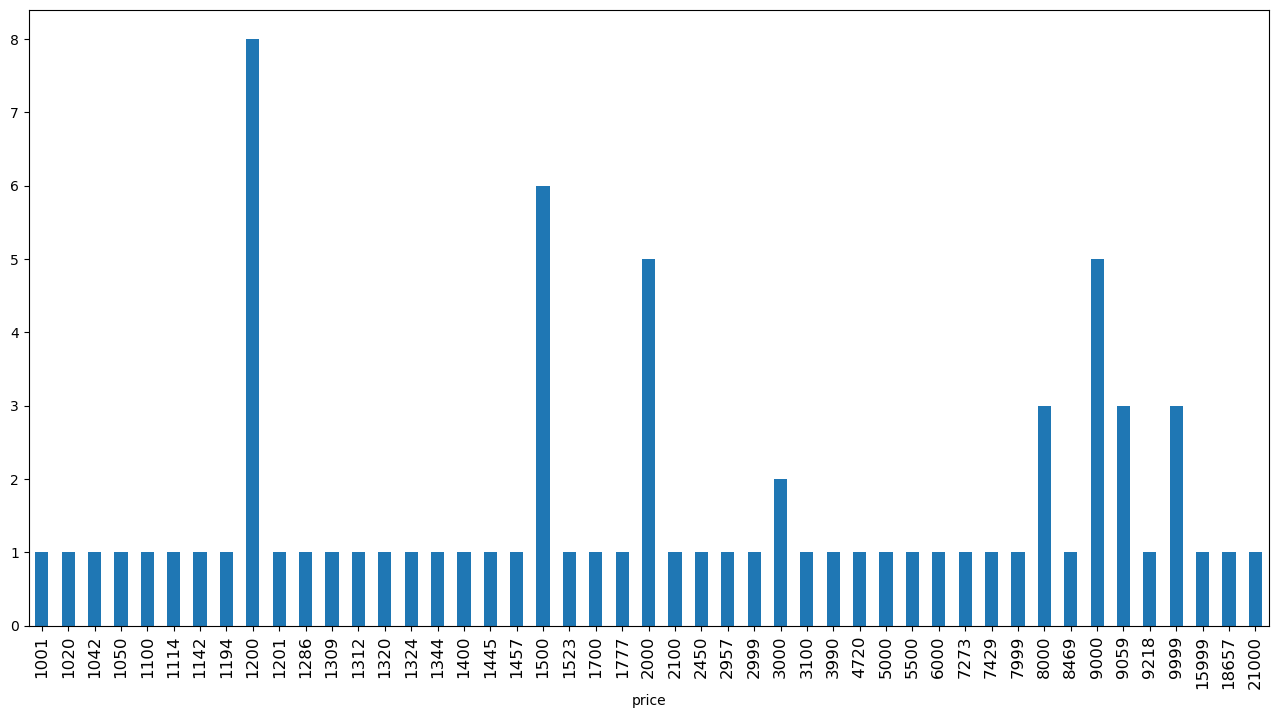

In [143]:
#hacemos gráfico de barras
plt.figure(figsize = (16,8))
listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()
plt.xticks(size = 12);

Es raro el valor de 1139 y de 9999. Pero 8000 tiene un valor como 9999 de frecuencia asi que no podemos descartarlo. Lo dejaría como está Veremos lo del mínimo de 8

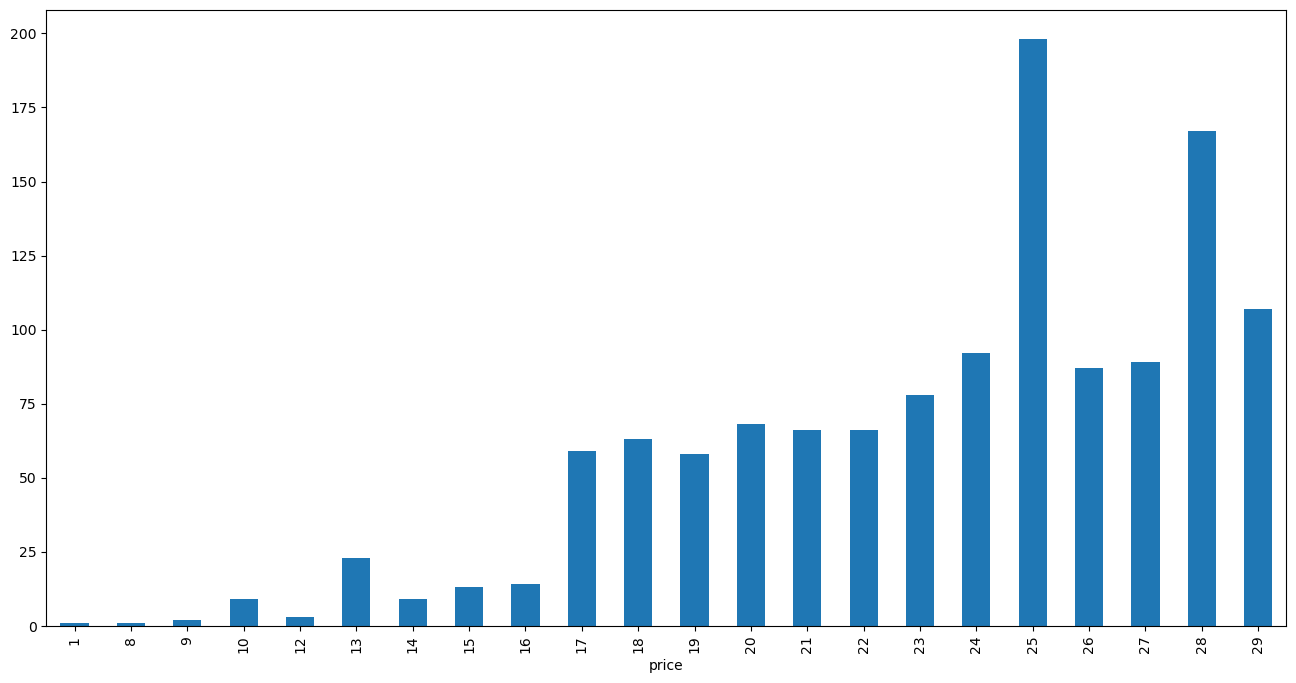

In [144]:
plt.figure(figsize = (16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

Aquí hay que pensar si merece la pena invertir en un inmueble en el que se paga -25€ la noche. No es algo que interese y lo descartamos.

In [145]:
#Una vez analizado, lo tenemos
listings = listings.loc[listings.price > 24]
listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,902671779171769624,Habitación centro de Madrid 4,50080380,Centro,Cortes,40.411812,-3.697614,Private room,77,7,17,0
1,9753808,Habitación cuqui,41563621,Centro,Embajadores,40.410970,-3.698240,Private room,54,1,1,0
2,46899002,Habitación Doble con Baño Compartido,331096767,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,55,1,4,0
3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Centro,Palacio,40.408240,-3.713480,Private room,69,7,95,0
4,49895335,Teste,86662970,Ciudad Lineal,San Juan Bautista,40.453560,-3.656380,Private room,200,1,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
26974,34832363,2beedroom apartment close 2 Wanda stadium& air...,8039831,Hortaleza,Valdefuentes,40.486310,-3.649270,Entire home/apt,550,1,1,365
26975,40752289,Habitación privada en las afueras,316452014,Hortaleza,Canillas,40.465790,-3.646310,Private room,55,1,1,89
26976,1012976789399108005,habitación confortable baño privado,543956287,Carabanchel,San Isidro,40.398368,-3.731176,Private room,50,1,1,262
26978,45926609,Bonita y alegre habitación a 10 mins de Atocha,20609984,Puente de Vallecas,San Diego,40.394390,-3.664280,Private room,35,7,12,365


In [146]:
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,26240.0,131.252973,335.280748,25.0,59.0,100.0,145.0,21000.0
minimum_nights,26240.0,7.852363,30.139742,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,26240.0,30.245655,69.911724,1.0,1.0,3.0,17.0,322.0
availability_365,26240.0,156.558537,129.084822,0.0,24.0,141.0,278.0,365.0


In [147]:
#Elegir valores desde el percentil 280.
percentil_95 = listings['price'].quantile(0.95)
print(f"Límite en el percentil 95: {percentil_95}")

listings = listings.loc[listings.price < percentil_95]
listings

Límite en el percentil 95: 280.0


,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,902671779171769624,Habitación centro de Madrid 4,50080380,Centro,Cortes,40.411812,-3.697614,Private room,77,7,17,0
1,9753808,Habitación cuqui,41563621,Centro,Embajadores,40.410970,-3.698240,Private room,54,1,1,0
2,46899002,Habitación Doble con Baño Compartido,331096767,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,55,1,4,0
3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Centro,Palacio,40.408240,-3.713480,Private room,69,7,95,0
4,49895335,Teste,86662970,Ciudad Lineal,San Juan Bautista,40.453560,-3.656380,Private room,200,1,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
26973,839829813025007300,Habitación cómoda y segura,503838560,Puente de Vallecas,Entrevías,40.378598,-3.664911,Private room,50,1,1,365
26975,40752289,Habitación privada en las afueras,316452014,Hortaleza,Canillas,40.465790,-3.646310,Private room,55,1,1,89
26976,1012976789399108005,habitación confortable baño privado,543956287,Carabanchel,San Isidro,40.398368,-3.731176,Private room,50,1,1,262
26978,45926609,Bonita y alegre habitación a 10 mins de Atocha,20609984,Puente de Vallecas,San Diego,40.394390,-3.664280,Private room,35,7,12,365


In [148]:
#Ahora vamos a ver la otra lista
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         26980 non-null  int64  
 1   id                                            26980 non-null  int64  
 2   listing_url                                   26980 non-null  object 
 3   scrape_id                                     26980 non-null  int64  
 4   last_scraped                                  26980 non-null  object 
 5   source                                        26980 non-null  object 
 6   name                                          26980 non-null  object 
 7   description                                   25773 non-null  object 
 8   neighborhood_overview                         12749 non-null  object 
 9   picture_url                                   26979 non-null 

In [149]:
#En vez de decir cuales voy a eliminar, voy a crear una lista a_incluir
a_incluir = ['id',
          'description',
          'host_is_superhost',
          'accommodates',
          'bathrooms',
          'bedrooms',
          'beds',
          'number_of_reviews',
          'review_scores_rating',
          'review_scores_communication',
          'review_scores_location']

listings_det = listings_det.loc[:,a_incluir]

In [150]:
listings_det

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,920645654779749874,Amazing modern and quite apparment in the hear...,f,4,NaN,1.0,NaN,0,NaN,NaN,NaN
1,889210192192502279,Break up with your day-to-day life and relax i...,f,1,NaN,NaN,NaN,0,NaN,NaN,NaN
2,40774969,"Economical, simple and central room, next to A...",f,2,NaN,NaN,NaN,0,NaN,NaN,NaN
3,19406581,"Flat with two bedrooms, I rent one with 1.35 b...",f,2,NaN,2.0,NaN,0,NaN,NaN,NaN
4,19495912,A bright bedroom with a double bed and everyt...,f,2,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26975,35195433,None,f,2,2.0,2.0,3.0,0,NaN,NaN,NaN
26976,1191981380013645801,"Welcome to your luxurious duplex in Salamanca,...",f,3,1.0,1.0,1.0,4,5.00,5.0,5.00
26977,1236989326731662848,Disconnect from your worries in this spacious ...,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN
26978,45926609,Nice and cheerful room in a SHARED apartment w...,f,2,1.0,1.0,NaN,3,5.00,5.0,5.00


## Análisis de tipos listings_det

In [151]:
#Análisis de tipos:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           26980 non-null  int64  
 1   description                  25773 non-null  object 
 2   host_is_superhost            26001 non-null  object 
 3   accommodates                 26980 non-null  int64  
 4   bathrooms                    21040 non-null  float64
 5   bedrooms                     24437 non-null  float64
 6   beds                         21018 non-null  float64
 7   number_of_reviews            26980 non-null  int64  
 8   review_scores_rating         21283 non-null  float64
 9   review_scores_communication  21283 non-null  float64
 10  review_scores_location       21280 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.3+ MB


host_is_superhost debería ser **categoría**. Si tuvieramos millones de registros lo hariamos pero vamos a hacerlo rápido para ver el ejemplo

In [152]:
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')

In [153]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           26980 non-null  int64   
 1   description                  25773 non-null  object  
 2   host_is_superhost            26001 non-null  category
 3   accommodates                 26980 non-null  int64   
 4   bathrooms                    21040 non-null  float64 
 5   bedrooms                     24437 non-null  float64 
 6   beds                         21018 non-null  float64 
 7   number_of_reviews            26980 non-null  int64   
 8   review_scores_rating         21283 non-null  float64 
 9   review_scores_communication  21283 non-null  float64 
 10  review_scores_location       21280 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 2.1+ MB


In [154]:
listings_det.isna().sum()

id                                0
description                    1207
host_is_superhost               979
accommodates                      0
bathrooms                      5940
bedrooms                       2543
beds                           5962
number_of_reviews                 0
review_scores_rating           5697
review_scores_communication    5697
review_scores_location         5700
dtype: int64

In [155]:
null_percent = listings_det.isnull().mean() * 100
print(null_percent)

id                              0.000000
description                     4.473684
host_is_superhost               3.628614
accommodates                    0.000000
bathrooms                      22.016308
bedrooms                        9.425500
beds                           22.097850
number_of_reviews               0.000000
review_scores_rating           21.115641
review_scores_communication    21.115641
review_scores_location         21.126761
dtype: float64


In [156]:
#Vamos a centrarnos primero en description, host_is_superhost y bedrooms:

listings_det['description'] = listings_det['description'].fillna('Sin descripción')

In [157]:
# Calcular la mediana y redondear al entero más cercano
median_bedrooms = round(listings_det['bedrooms'].median())

listings_det['bedrooms'] = listings_det['bedrooms'].fillna(median_bedrooms)

In [158]:
listings_det.bedrooms.isna().sum()

0

In [159]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           26980 non-null  int64   
 1   description                  26980 non-null  object  
 2   host_is_superhost            26001 non-null  category
 3   accommodates                 26980 non-null  int64   
 4   bathrooms                    21040 non-null  float64 
 5   bedrooms                     26980 non-null  float64 
 6   beds                         21018 non-null  float64 
 7   number_of_reviews            26980 non-null  int64   
 8   review_scores_rating         21283 non-null  float64 
 9   review_scores_communication  21283 non-null  float64 
 10  review_scores_location       21280 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 2.1+ MB


In [160]:
listings_det['bedrooms'] = listings_det['bedrooms'].astype('int64')

In [161]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           26980 non-null  int64   
 1   description                  26980 non-null  object  
 2   host_is_superhost            26001 non-null  category
 3   accommodates                 26980 non-null  int64   
 4   bathrooms                    21040 non-null  float64 
 5   bedrooms                     26980 non-null  int64   
 6   beds                         21018 non-null  float64 
 7   number_of_reviews            26980 non-null  int64   
 8   review_scores_rating         21283 non-null  float64 
 9   review_scores_communication  21283 non-null  float64 
 10  review_scores_location       21280 non-null  float64 
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 2.1+ MB


In [163]:
# Asegurar que 'Desconocido' sea una categoría válida
if 'Desconocido' not in listings_det['host_is_superhost'].cat.categories:
    listings_det['host_is_superhost'] = listings_det['host_is_superhost'].cat.add_categories(['Desconocido'])

# Rellenar nulos con 'Desconocido'
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].fillna('Desconocido')

# Verificar si quedan nulos
print(listings_det['host_is_superhost'].isnull().sum())

# Verificar las categorías
print(listings_det['host_is_superhost'].cat.categories)

0
Index(['f', 't', 'Desconocido'], dtype='object')


In [164]:
null_percent = listings_det.isnull().mean() * 100
print(null_percent)

id                              0.000000
description                     0.000000
host_is_superhost               0.000000
accommodates                    0.000000
bathrooms                      22.016308
bedrooms                        0.000000
beds                           22.097850
number_of_reviews               0.000000
review_scores_rating           21.115641
review_scores_communication    21.115641
review_scores_location         21.126761
dtype: float64


In [165]:
#Eliminamos bathrooms porque no nos interesa. beds nos itneresará más
listings_det.drop(columns = 'bathrooms', inplace = True)

Vamos a intentar estimar estos nulos de beds usando algún "proxy". Por ejemplo estimar el numero de habitaciones a partir del número de camas a partir del accommodates.

In [166]:
#Buscamos relación entre beds y accommodates
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,81,187,40,98,20,15,6,11,1,0,0,1,0,0,0,0
1.0,2537,5940,431,704,23,30,4,1,1,3,0,0,0,0,0,0
2.0,122,880,1390,3168,129,145,4,8,0,1,0,1,1,0,0,0
3.0,19,68,219,1020,500,761,25,29,2,3,1,1,0,0,0,0
4.0,34,30,24,210,253,569,104,159,4,5,0,2,0,0,0,0
5.0,10,6,2,21,40,149,72,111,20,32,0,2,0,0,0,0
6.0,20,7,6,8,6,51,17,70,13,29,7,10,0,1,0,0
7.0,4,2,1,2,0,3,6,12,19,15,5,10,2,3,0,0
8.0,5,5,1,1,3,3,2,20,2,12,2,11,3,2,0,2


Si el piso acomoda a 1-2 personas, entonces suele tener 1 cama Si el piso acomoda a 3-4 personas, entonces suele tener 2 camas...

In [167]:
#Creación de variables complejos a partir de criterios múltiples
listings_det.beds.value_counts(dropna = False)

beds
1.0     9674
NaN     5962
2.0     5849
3.0     2648
4.0     1394
5.0      465
0.0      460
6.0      245
7.0       84
8.0       74
10.0      38
9.0       29
12.0      23
14.0      10
20.0       7
11.0       5
13.0       4
15.0       3
16.0       2
17.0       1
30.0       1
18.0       1
40.0       1
Name: count, dtype: int64

In [168]:
def imputar_nulos(registro):
    #lista de condiciones
    condiciones = [(registro.accommodates <= 2),
                   (registro.accommodates > 2) & (registro.accommodates <= 4),
                   (registro.accommodates > 4) & (registro.accommodates <= 6),
                   (registro.accommodates > 6)]
    #lista de los resultados
    resultados = [1,2,3,4]
    #Salida
    return(np.select(condiciones, resultados, default = -999))
#Para que me sobreescriba los nulos unicamente
listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis = 1).astype('int64')

0        2
1        1
2        1
3        1
4        1
        ..
26599    1
26637    1
26641    1
26671    1
26978    1
Length: 5962, dtype: int64

In [169]:
#¡Funciona! Así que sobreescribimos
listings_det.loc[listings_det.beds.isna(),'beds'] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis = 1).astype('int64')

In [170]:
listings_det.beds.value_counts(dropna = False)

beds
1.0     13403
2.0      7413
3.0      3153
4.0      1558
5.0       465
0.0       460
6.0       245
7.0        84
8.0        74
10.0       38
9.0        29
12.0       23
14.0       10
20.0        7
11.0        5
13.0        4
15.0        3
16.0        2
17.0        1
30.0        1
18.0        1
40.0        1
Name: count, dtype: int64

In [172]:
#Ahora la misma estrategia para imputar el número de habitaciones.
listings_det.bedrooms.isna().sum()

0

Ya estaría. Recordemos que hacemos eso para estimar el tamaño del piso (m2) que puede tener basandonos en el numero de camas o habitaciones.

In [173]:
#Análisis de duplicados
listings_det.duplicated().sum()

0

In [174]:
#Análisis de categóricas, aunque no nos va a interesar mucho porque no sabemos qué es.
listings_det.host_is_superhost.value_counts()

host_is_superhost
f              19651
t               6350
Desconocido      979
Name: count, dtype: int64

In [175]:
#Análisis de variables númericas
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           26980 non-null  int64   
 1   description                  26980 non-null  object  
 2   host_is_superhost            26980 non-null  category
 3   accommodates                 26980 non-null  int64   
 4   bedrooms                     26980 non-null  int64   
 5   beds                         26980 non-null  float64 
 6   number_of_reviews            26980 non-null  int64   
 7   review_scores_rating         21283 non-null  float64 
 8   review_scores_communication  21283 non-null  float64 
 9   review_scores_location       21280 non-null  float64 
dtypes: category(1), float64(4), int64(4), object(1)
memory usage: 1.9+ MB


In [176]:
#Podríamos hacer un iloc o directamente el selector del describe para incluir solo variables númericas.
#Esta vez lo haremos con describe
listings_det.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
id,26980.0,5.668026e+17,4.998059e+17,21853.0,35048778.25,7.167125e+17,1.045543e+18,1.242720e+18
accommodates,26980.0,3.119496e+00,1.893615e+00,1.0,2.00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,26980.0,1.390363e+00,9.362079e-01,0.0,1.00,1.000000e+00,2.000000e+00,2.500000e+01
beds,26980.0,1.867346e+00,1.380019e+00,0.0,1.00,1.000000e+00,2.000000e+00,4.000000e+01
number_of_reviews,26980.0,4.556809e+01,8.659795e+01,0.0,1.00,1.000000e+01,4.900000e+01,1.092000e+03
review_scores_rating,21283.0,4.650873e+00,4.788141e-01,1.0,4.55,4.770000e+00,4.930000e+00,5.000000e+00
review_scores_communication,21283.0,4.757341e+00,4.568849e-01,1.0,4.73,4.890000e+00,5.000000e+00,5.000000e+00
review_scores_location,21280.0,4.751930e+00,3.814902e-01,1.0,4.67,4.870000e+00,4.990000e+00,5.000000e+00


In [177]:
listings_det.shape

(26980, 10)

**Ahora crearemos el datamart analítico para unir las cosas**

In [178]:
#tabla de izquierda, tabla de derecha, queremeos union listings porque es la que manda. Left join 
df = pd.merge(left = listings, right = listings_det, how = 'left', on = 'id')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,902671779171769624,Habitación centro de Madrid 4,50080380,Centro,Cortes,40.411812,-3.697614,Private room,77,7,...,0,"Enjoy the simplicity of this quiet, central home.",f,2,1,1.0,3,4.0,4.67,5.00
1,9753808,Habitación cuqui,41563621,Centro,Embajadores,40.410970,-3.698240,Private room,54,1,...,0,Student Room,f,1,1,1.0,1,5.0,5.00,5.00
2,46899002,Habitación Doble con Baño Compartido,331096767,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,55,1,...,0,Sin descripción,f,2,1,1.0,0,NaN,NaN,NaN
3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Centro,Palacio,40.408240,-3.713480,Private room,69,7,...,0,Sin descripción,f,1,1,1.0,0,NaN,NaN,NaN
4,49895335,Teste,86662970,Ciudad Lineal,San Juan Bautista,40.453560,-3.656380,Private room,200,1,...,365,Sin descripción,f,2,1,1.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24905,839829813025007300,Habitación cómoda y segura,503838560,Puente de Vallecas,Entrevías,40.378598,-3.664911,Private room,50,1,...,365,Enjoy the simplicity of this quiet and central...,f,1,1,1.0,0,NaN,NaN,NaN
24906,40752289,Habitación privada en las afueras,316452014,Hortaleza,Canillas,40.465790,-3.646310,Private room,55,1,...,89,Apartment with private room,f,1,1,1.0,1,5.0,5.00,4.00
24907,1012976789399108005,habitación confortable baño privado,543956287,Carabanchel,San Isidro,40.398368,-3.731176,Private room,50,1,...,262,Take the whole family to this fantastic home t...,t,2,1,1.0,21,4.9,4.90,4.33
24908,45926609,Bonita y alegre habitación a 10 mins de Atocha,20609984,Puente de Vallecas,San Diego,40.394390,-3.664280,Private room,35,7,...,365,Nice and cheerful room in a SHARED apartment w...,f,2,1,1.0,3,5.0,5.00,5.00


In [179]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int32 
 1   distrito   21 non-null     object
dtypes: int32(1), object(1)
memory usage: 384.0+ bytes


In [180]:
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,902671779171769624,Habitación centro de Madrid 4,50080380,Centro,Cortes,40.411812,-3.697614,Private room,77,7,...,0,"Enjoy the simplicity of this quiet, central home.",f,2,1,1.0,3,4.0,4.67,5.0
1,9753808,Habitación cuqui,41563621,Centro,Embajadores,40.410970,-3.698240,Private room,54,1,...,0,Student Room,f,1,1,1.0,1,5.0,5.00,5.0
2,46899002,Habitación Doble con Baño Compartido,331096767,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,55,1,...,0,Sin descripción,f,2,1,1.0,0,NaN,NaN,NaN
3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Centro,Palacio,40.408240,-3.713480,Private room,69,7,...,0,Sin descripción,f,1,1,1.0,0,NaN,NaN,NaN
4,49895335,Teste,86662970,Ciudad Lineal,San Juan Bautista,40.453560,-3.656380,Private room,200,1,...,365,Sin descripción,f,2,1,1.0,0,NaN,NaN,NaN


**Queremos que los literales sean iguales. Es importante (Por ejemplo, Chamartin o Chamartín, no nos lo cruzará)**

In [181]:
df.neighbourhood_group.unique().categories

Index(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'],
      dtype='object')

In [182]:
precio_m2.distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza', 'Latina',
       'Moncloa', 'Moratalaz', 'Puente de Vallecas', 'Retiro',
       'Salamanca', 'San Blas', 'Tetuán', 'Usera', 'Vicálvaro',
       'Villa de Vallecas', 'Villaverde'], dtype=object)

In [183]:
#utilizamos map con diccionario viejo: antiguo

precio_m2.distrito = precio_m2.distrito.map({'Fuencarral':'Fuencarral - El Pardo',
                                             'San Blas':'San Blas - Canillejas',
                                             'Moncloa':'Moncloa - Aravaca'}) \
                                            .fillna(precio_m2.distrito)

precio_m2

,precio_m2,distrito
1,5062,Arganzuela
2,3901,Barajas
3,2889,Carabanchel
4,6594,Centro
5,6573,Chamartín
6,7173,Chamberí
7,4002,Ciudad Lineal
8,4305,Fuencarral - El Pardo
9,4490,Hortaleza
10,3068,Latina


In [184]:
#Volvemos a integrar
df = pd.merge(left = df, right = precio_m2, how = 'left', left_on = 'neighbourhood_group', right_on = 'distrito')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,902671779171769624,Habitación centro de Madrid 4,50080380,Centro,Cortes,40.411812,-3.697614,Private room,77,7,...,f,2,1,1.0,3,4.0,4.67,5.00,6594,Centro
1,9753808,Habitación cuqui,41563621,Centro,Embajadores,40.410970,-3.698240,Private room,54,1,...,f,1,1,1.0,1,5.0,5.00,5.00,6594,Centro
2,46899002,Habitación Doble con Baño Compartido,331096767,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,55,1,...,f,2,1,1.0,0,NaN,NaN,NaN,3194,San Blas - Canillejas
3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Centro,Palacio,40.408240,-3.713480,Private room,69,7,...,f,1,1,1.0,0,NaN,NaN,NaN,6594,Centro
4,49895335,Teste,86662970,Ciudad Lineal,San Juan Bautista,40.453560,-3.656380,Private room,200,1,...,f,2,1,1.0,0,NaN,NaN,NaN,4002,Ciudad Lineal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24905,839829813025007300,Habitación cómoda y segura,503838560,Puente de Vallecas,Entrevías,40.378598,-3.664911,Private room,50,1,...,f,1,1,1.0,0,NaN,NaN,NaN,2518,Puente de Vallecas
24906,40752289,Habitación privada en las afueras,316452014,Hortaleza,Canillas,40.465790,-3.646310,Private room,55,1,...,f,1,1,1.0,1,5.0,5.00,4.00,4490,Hortaleza
24907,1012976789399108005,habitación confortable baño privado,543956287,Carabanchel,San Isidro,40.398368,-3.731176,Private room,50,1,...,t,2,1,1.0,21,4.9,4.90,4.33,2889,Carabanchel
24908,45926609,Bonita y alegre habitación a 10 mins de Atocha,20609984,Puente de Vallecas,San Diego,40.394390,-3.664280,Private room,35,7,...,f,2,1,1.0,3,5.0,5.00,5.00,2518,Puente de Vallecas


In [185]:
#Comprobamos si falla el cruce, pero vemos que no

df.precio_m2.isna().sum()

0

In [186]:
#conexion
df.to_sql('df', con = con, if_exists='replace')

24910